In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd
from scipy import interpolate
from numpy import polynomial
from scipy import optimize

Hydrogen Barrier Energy - 7.113769623553246e-20 

Deuterium Barrier Energy - 7.787798009000183e-20

Hydrogen Well Frequency - 593334077003661.5

Deuterium Well Frequency - 438357914964142.5

Hydrogen Barrier Frequency - 304003801201848.1

Deuterium Barrier Frequency - 223862618702505.94

# Using quartic potential 

In [4]:
def potential(q, omega_b, omega_0, E_b):
    q_0 = ((12*E_b)/(m*(omega_b**2 + omega_0**2)))**0.5
    a_2 = -0.5*m*(omega_b**2)
    a_3 = ((2*(omega_b**2) - omega_0**2)*(m**1.5)*(omega_b**3))/(3*q_0*(m**0.5)*(omega_b**3))
    a_4 = ((omega_0**2 - omega_b**2)*(m**2)*(omega_b**4))/(4*(q_0**2)*m*(omega_0)**4)
    V = a_2*(q**2) + a_3*((abs(q))**3) + a_4**(q**4)
    return(V)

In [5]:
def integrand(q, omega_b, omega_0, E_b, E_proton):
    return((potential(q, omega_b, omega_0, E_b)-E_proton)**0.5)

In [8]:
def double_well(omega_b, omega_0, E_b, E_proton):
    m = 1.66054e-27
    q_0 = ((12*E_b)/(m*(omega_b**2 + omega_0**2)))**0.5
    print(q_0)
    q = np.linspace(-q_0, q_0, 1000000)
    V = np.zeros(1000000)
    
    for i in range(len(q)):
        V[i] = potential(q[i], omega_b, omega_0, E_b)
        
    difference = abs(V - E_proton)
    root = abs(q[np.where(difference == min(difference))])
    
    I = integrate.quad(integrand, -root[0], root[0], args=(omega_b, omega_0, E_b, E_proton))
    T = np.exp(-I[0])
    plt.plot(q, V)
#     plt.plot(root[0], E_proton, 'k+')
#     plt.plot(-root[0], E_proton, 'k+')
#     plt.axhline(E_proton, color ='r', linestyle ='--')
#     return(T)

In [36]:
%%time
a = double_well(omega_b=304003801201848.1, omega_0=593334077003661.5 , E_b=7.113769623553246e-20, E_proton=2.4367589999999998e-21)

3.400930305739575e-11


NameError: name 'm' is not defined

In [11]:
# %%time
# T_values = np.zeros(50)
# E_values = np.linspace(-0.9, -0.1, 50)
# for i in range(len(T_values)):
#     T_values[i] = double_well(1, 1, 1, E_values[i])
# plt.plot(E_values, T_values)

## Using double harmonic potential 

In [12]:
def harmonic_1(x, k):
    return(0.5*k*(x**2))

In [33]:
def integrand_1(x, k, E_proton):
    return((harmonic_1(x, k) - E_proton)**0.5)

In [25]:
def harmonic_2(x, k, a):
    return(0.5*k*(x-2*a)**2)

In [26]:
def integrand_2(x, k, a, E_proton):
    return((harmonic_2(x, k, a) - E_proton)**0.5)

Reduced mass of hydrogen and carbon = ((1x12)/(1+12))u = 1.5328061538461539e-27

Hydrogen Well Frequency = 593334077003661.5

Hydrogen Force Constant = $\omega_0^2\mu$ = 539.6172435568898

Hydrogen Energy Barrier = 7.113769623553246e-20 

$E_b = ka^2/2$

$a = \sqrt(2E_b/k)$ = 1.6237605527900583e-11

Reduced mass of deuterium and carbon = ((2x12)/(2+12))u = 2.8466399999999998e-27

Deuterium Well Frequency = 438357914964142.5

Deuterium Force Constant = $\omega_0^2\mu$ = 547.0036858503591

In [34]:
def harmonic_transmission(k, E_barrier, E_proton, a):
    x = np.linspace(0, 2*a, 1000000)
    har_1 = np.zeros(1000000)
    har_2 = np.zeros(1000000)
    
    for i in range(len(x)):
        har_1[i] = harmonic_1(x[i], k)
        har_2[i] = harmonic_2(x[i], k, a)
    
    difference_1 = abs(har_1 - E_proton)
    root_1 = x[np.where(difference_1 == min(difference_1))]
    
    difference_2 = abs(har_2 - E_proton)
    root_2 = x[np.where(difference_2 == min(difference_2))]
    
    I1 = integrate.quad(integrand_1, root_1, a, args=(k, E_proton))
    I2 = integrate.quad(integrand_2, a, root_2, args=(k, a, E_proton))
    
    plt.plot(x, har_1)
    plt.plot(x, har_2)
    plt.axhline(E_proton, c='r', ls='--')
    return(I1, I2)

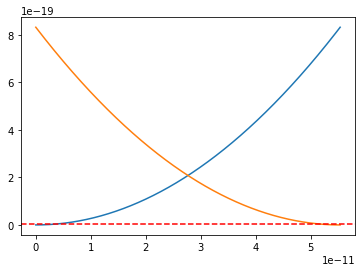

In [35]:
a = harmonic_transmission(543, 9.023789852e-20, 2.057094e-21, 2.7672e-11)

# Interpolating IRC Data

In [72]:
IRC1 = pd.read_csv('./TightDataForConditions1+2/IRCCondition1.tsv', sep='\t')

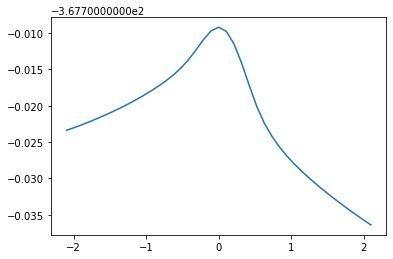

In [74]:
plt.plot(IRC1['IRC'], IRC1['Total energy/hartree'])

In [77]:
a = interpolate.interp1d(IRC1['IRC'], IRC1['Total energy/hartree'])

In [104]:
IRC1['IRC'][20:41]

20    0.000000
21   -0.104964
22   -0.209901
23   -0.314839
24   -0.419747
25   -0.524505
26   -0.628789
27   -0.733107
28   -0.837828
29   -0.942592
30   -1.047385
31   -1.152224
32   -1.257102
33   -1.362003
34   -1.466918
35   -1.571849
36   -1.676788
37   -1.781735
38   -1.886684
39   -1.991636
40   -2.096590
Name: IRC, dtype: float64

In [119]:
b = polynomial.polynomial.Polynomial.fit(IRC1['IRC'], IRC1['Total energy/hartree'], 4)

In [117]:
b

Polynomial([-3.67711546e+02, -1.08395592e-02, -7.46841889e-02,  7.32214467e-03,
        1.19017164e-01, -2.95900158e-03, -6.36838095e-02], domain=[-2.09658969,  2.09710543], window=[-1.,  1.])

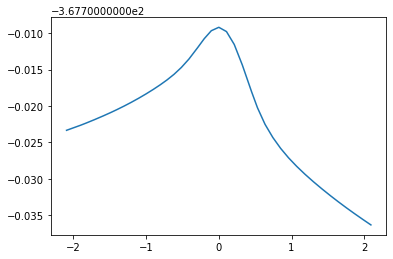

In [81]:
x = np.linspace(-2.09,2.09, 10000)
y = np.zeros(10000)
for i in range(len(x)):
    y[i] = a(x[i])
plt.plot(x, y)

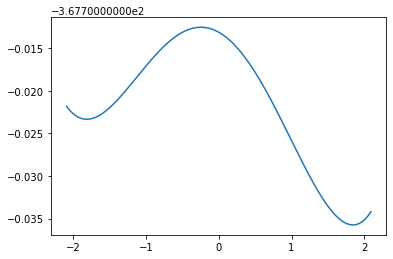

In [120]:
x = np.linspace(-2.09, 2.09, 10000)
y = np.zeros(10000)
for i in range(len(x)):
    y[i] = b(x[i])
plt.plot(x, y)

In [151]:
N = len(IRC1['IRC'])
sigma = np.ones(N)
sigma[[0, 20, 40]] = 0.01

In [152]:
def f(x, a_0, a_1, a_2, a_3, a_4):
    return(a_0 + a_1*x + a_2*(x**2) + a_3*(x**3) + a_4*(x**4))

In [153]:
p1 = optimize.curve_fit(f, IRC1['IRC'], IRC1['Total energy/hartree'], sigma=sigma)
p2 = optimize.curve_fit(f, IRC1['IRC'], IRC1['Total energy/hartree'], sigma=np.ones(N))

In [167]:
p1

(array([-3.67709196e+02, -4.68092899e-03, -1.28278352e-02,  3.58103043e-04,
         1.84752949e-03]),
 array([[ 9.90562356e-10,  7.86462349e-14, -9.01600897e-10,
         -8.83806423e-14,  1.53821523e-10],
        [ 7.86462349e-14,  7.40539899e-07, -7.84877074e-11,
         -1.68570530e-07,  2.24640302e-12],
        [-9.01600897e-10, -7.84877074e-11,  5.06112988e-07,
          8.96071704e-11, -1.15068817e-07],
        [-8.83806423e-14, -1.68570530e-07,  8.96071704e-11,
          3.83778847e-08, -1.68266613e-11],
        [ 1.53821523e-10,  2.24640302e-12, -1.15068817e-07,
         -1.68266613e-11,  2.61657853e-08]]))

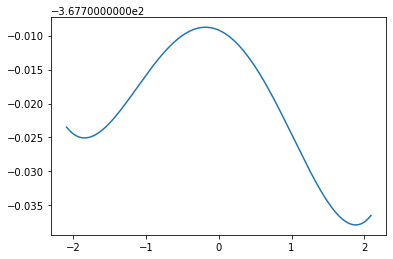

In [164]:
x = np.linspace(-2.09, 2.09, 10000)
y1 = np.zeros(10000)
y2 = np.zeros(10000)
for i in range(len(x)):
    y1[i] = f(x[i], p1[0][0], p1[0][1], p1[0][2], p1[0][3], p1[0][4])
    y2[i] = f(x[i], p2[0][0], p2[0][1], p2[0][2], p2[0][3], p2[0][4])
plt.figure()
plt.plot(x, y1)
# plt.plot(x, y2)

In [166]:
IRC1['IRC'][20]

0.0

In [169]:
y2[5000]

-367.7131116867503

In [136]:
p2

(array([-3.67713111e+02, -4.79595782e-03, -9.81451838e-03,  4.19296540e-04,
         1.46608095e-03]),
 array([[ 3.13247035e-07,  9.81900095e-11, -3.18193367e-07,
         -3.84667741e-11,  6.22632044e-08],
        [ 9.81900095e-11,  3.62353480e-07, -3.24264157e-10,
         -1.10034891e-07,  8.41958313e-11],
        [-3.18193367e-07, -3.24264157e-10,  5.81258658e-07,
          1.45103736e-10, -1.35277943e-07],
        [-3.84667741e-11, -1.10034891e-07,  1.45103736e-10,
          3.97560981e-08, -4.03873128e-11],
        [ 6.22632044e-08,  8.41958313e-11, -1.35277943e-07,
         -4.03873128e-11,  3.42541369e-08]]))